<a href="https://colab.research.google.com/github/tyleralgigi/TSG-genetic-algo/blob/main/a2_talgigi2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2**

## Tyler Algigi

## talgigi2018

## The traveling salesmen problem using genetic

**How were the cities and distances represented (as a data structure)?**

Each city is represented as a City class with its own x and y cordinates. These cities are stored in an array of City classes.


**How did you handle the creation of the initial population?**

The inital population is created  by taking the inital list of Cities and creating a route with random.sample of k length. Where K is equal to the number of cities in the initial city list. Each route is appened to the populatiuon and this is looped N times.


**How did you compute the fitness score?**

The fitness score is calulated by taking the distance to travel the route and putting it under 1. So 1/route distanace.


**Which parent selection strategy did you use? Why?**

The parents get selected in 2 ways. First we select the elite samples first keeping only the best of the current generation. We then select one other parent by using a touranment selection method. This is done by selecting 5 random parents from the current generation and narrowing the selection down to 1 parent by comparing each fitness score 1 vs 1 in a tournament style. 


**Which crossover strategy(ies) did you try? Which one worked out best?**

After reading through Eric Stoltz solution to this problem he used the stratiege of ordered crossover. To follow the rules of TSP we needed to keep the ordered pairs together. So we would select a random subset from one parent and fill in the rest of the values using the other parent during breeding.


**Which mutation strategy(ies) did you try? Which one worked out best?**

After reading through Eric Stoltz solution to this problem, I saw that his method for mutation was very efffective. He set a lower mutation and random would swap one city between the individual in the population. This indeed did turn out to be an effective method.


**Which strategy did you use for populating the next generation? Why?**

To create the next population I kept the best routes from the current population and using the mutation and crossover stratgy above breed the rest of the next generation.


**Which stopping condition did you use? Why?**

I chose like Eric Stoltz to use a maximum number of generation as the stopping condition.


**What other parameters, design choices, initialization and configuration steps are relevant to your design and implementation?**

I used a global population and cityList values, as well as tournament parent selection strategy. 



Start


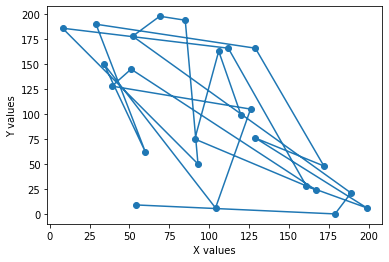

Initial distance: 2370.158056282367
Final distance: 828.7672869078174


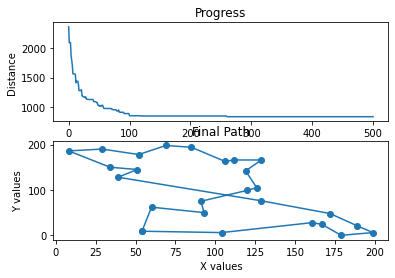

In [ ]:
import random
from math import sqrt

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.path import Path

cityList = []
population = []


class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, city):
        xdis = abs(self.x - city.x)
        ydis = abs(self.y - city.y)
        dis = sqrt((xdis**2) + (ydis**2))
        return dis

    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"


class Fitness:
    def __init__(self, route):
        self.route = route
        self.dis = 0
        self.fit = 0

    def routeDistance(self):
        if self.dis == 0:
            pathDis = 0
            # looping through route to calculate distance
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    # getting next city in route
                    toCity = self.route[i + 1]
                else:
                    # returning to start city
                    toCity = self.route[0]
                pathDis += fromCity.distance(toCity)
            self.dis = pathDis
        return self.dis

    def fitnessScore(self):
        if self.fit == 0:
            self.fit = 1/float(self.routeDistance())
        return self.fit


def plotCities():
    x = [cities.x for cities in cityList]
    y = [cities.y for cities in cityList]
    plt.scatter(x, y)
    plt.plot(x, y)
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.show()


def initValues(size):
    # Initial City List
    for i in range(0, 25):
        cityList.append(City(x=int(random.random()*200),
                        y=int(random.random()*200)))

    # Initial Population
    for i in range(0, size):
        population.append(createRoute())


def createRoute():
    route = random.sample(cityList, len(cityList))
    return route


def rankRoutes():
    results = {}

    for i in range(0, len(population)):
        results[i] = Fitness(route=population[i]).fitnessScore()

    return sorted(results.items(), key=lambda kv: kv[1], reverse=True)


def slection(rankedList, size):
    selectionResults = []

    for i in range(0, size):
        selectionResults.append(rankedList[i][0])
    for i in range(0, len(rankedList) - size):
        player_1 = random.randint(0, len(rankedList)-1)
        player_2 = random.randint(0, len(rankedList)-1)
        if rankedList[player_1][1] >= rankedList[player_2][1]:
            selectionResults.append(rankedList[player_1][0])
        else:
            selectionResults.append(rankedList[player_2][0])

    return selectionResults


def matingPool(population, selectionResults):
    pool = []

    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        pool.append(population[index])
    return pool


def breed(p1, p2):
    child = []
    childP1 = []
    childP2 = []

    # ordered crossover
    geneA = int(random.random() * len(p1))
    geneB = int(random.random() * len(p1))

    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(p1[i])

    childP2 = [gene for gene in p2 if gene not in childP1]

    child = childP1 + childP2
    return child


def breedPop(pool, size):
    children = []
    total = len(pool) - size
    sameplePool = random.sample(pool, len(pool))

    # using elitism
    for i in range(0, size):
        children.append(pool[i])

    # breed for rest of pool
    for i in range(0, total):
        child = breed(sameplePool[i], sameplePool[(len(pool) - i) - 1])
        children.append(child)
    return children


def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))

            city1 = individual[swapped]
            city2 = individual[swapWith]

            individual[swapped] = city2
            individual[swapWith] = city1
    return individual


def mutatePopulation(children, mutationRate):
    mutatedPop = []

    for i in range(0, len(children)):
        mutated = mutate(children[i], mutationRate)
        mutatedPop.append(mutated)
    return mutatedPop


def nextGeneration(currentGen, eliteSize, mutationRate):
    rankedList = rankRoutes()
    selectionResults = slection(rankedList, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPop(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration


def geneAlgo(popSize, eliteSize, mutationRate, generations):
    global population
    initValues(popSize)
    progress = []
    print("Initial distance: " + str(1 / rankRoutes()[0][1]))
    progress.append(1 / rankRoutes()[0][1])

    for i in range(0, generations):
        population = nextGeneration(population, eliteSize, mutationRate)
        progress.append(1 / rankRoutes()[0][1])

    print("Final distance: " + str(1 / rankRoutes()[0][1]))
    bestRouteIndex = rankRoutes()[0][0]
    bestRoute = population[bestRouteIndex]
    fig, axs = plt.subplots(2)

    axs[0].plot(progress)
    axs[0].set_title("Progress")
    axs[0].set_ylabel('Distance')
    axs[0].set_xlabel('Generation')

    x = [cities.x for cities in bestRoute]
    x.append(bestRoute[0].x)
    y = [cities.y for cities in bestRoute]
    y.append(bestRoute[0].y)
    axs[1].set_title("Final Path")
    axs[1].scatter(x, y)
    axs[1].plot(x, y)
    axs[1].set_xlabel("X values")
    axs[1].set_ylabel("Y values")
    plt.show()

    return bestRoute


if __name__ == '__main__':
    print("Start")

    initValues(size=25)
    plotCities()
    bestRoute = geneAlgo(popSize=100, eliteSize=20,
                         mutationRate=0.01, generations=500)
